In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


>  The Pandas library to read CSV files named "train.csv" and "test.csv" from the specified Kaggle input path  and store them as DataFrames named 'train' and 'test', respectively.

In [53]:
train = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv")
test = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")

In [54]:
#the column names of the 'train' DataFrame,
train.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [55]:
# Summary statistics of numerical columns
print(train.describe().transpose())

                          count        mean         std         min  \
VendorID               175000.0    0.728377    0.445606    0.000000   
passenger_count        168923.0    1.357678    0.891283    0.000000   
trip_distance          175000.0    5.145930  394.971052    0.000000   
RatecodeID             168923.0    1.518307    6.514678    1.000000   
PULocationID           175000.0  132.710349   76.148799    1.000000   
DOLocationID           175000.0  132.701429   76.192493    1.000000   
extra                  175000.0    1.932143    1.948497   -7.500000   
tip_amount             175000.0    6.127497    4.610834    0.000079   
tolls_amount           175000.0    0.646816    2.328274  -29.300000   
improvement_surcharge  175000.0    0.979689    0.198775   -1.000000   
total_amount           175000.0   29.633901   25.425206 -576.750000   
congestion_surcharge   168923.0    2.246971    0.819216   -2.500000   
Airport_fee            168923.0    0.158825    0.511968   -1.750000   

     

>These summary statistics help identify the typical values and variability in the dataset. The negative values for tolls_amount and total_amount could be anomalies or errors in the data that require closer inspection and cleaning before using the dataset for analysis or modeling. 

In [56]:
# Check for missing values
print(train.isnull().sum())

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64


> Columns like 'passenger_count,' 'RatecodeID,' 'store_and_fwd_flag,' 'congestion_surcharge,' and 'Airport_fee' have 6077 missing values each. since there are 6077 missing rows so we simply can not drop this much rows, we'll impute it with suitable startgey.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

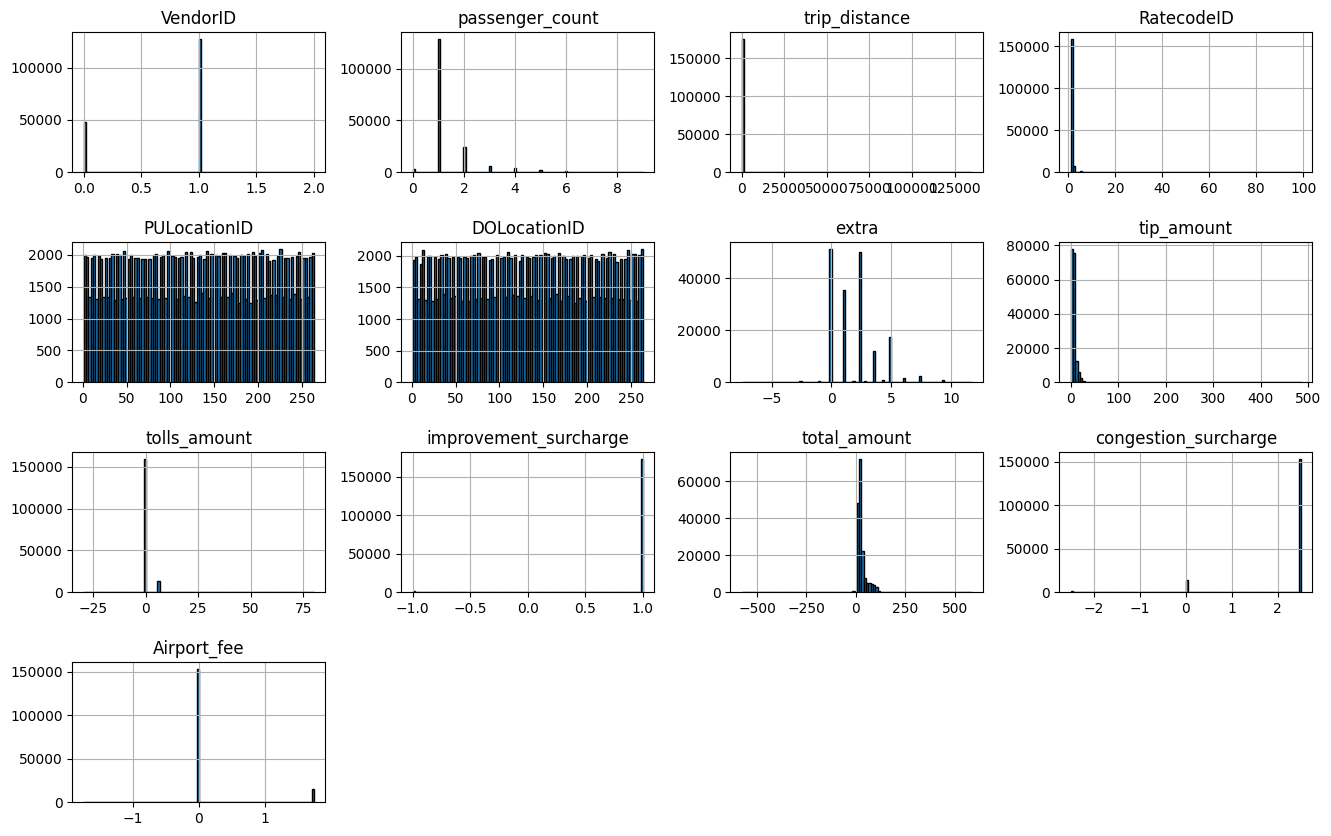

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
# Getting information about training data and Plotting Histogram to see the columns and their distributions. 
print(train.info())
train.hist(bins = 100, edgecolor = 'black', figsize=(16,10))
plt.subplots_adjust(hspace = 0.5,wspace = 0.3)
plt.show()

> The data types and non-null counts for each column. It also creates a histogram for numerical columns, revealing the distribution of values. 

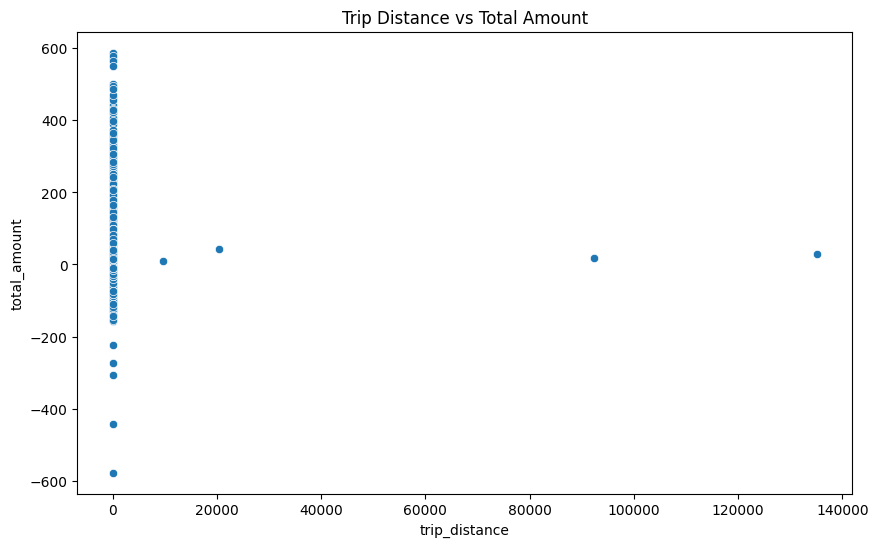

In [58]:
# Visualize the relationship between two numerical features (e.g., 'trip_distance' vs 'total_amount')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='total_amount', data=train)
plt.title('Trip Distance vs Total Amount')
plt.show()

> The plot helps explore the correlation or patterns between these two numerical features, providing insights into how the distance traveled relates to the total fare amount. The larger the points' concentration, the stronger the relationship between the variables. We can see some values of total_amount is in negative even though we have positive trip_distance this could be because of refunds. we can see that trip_distance is 0 but total_amount is showing positive because of on booking cancellation customer did not get refund.

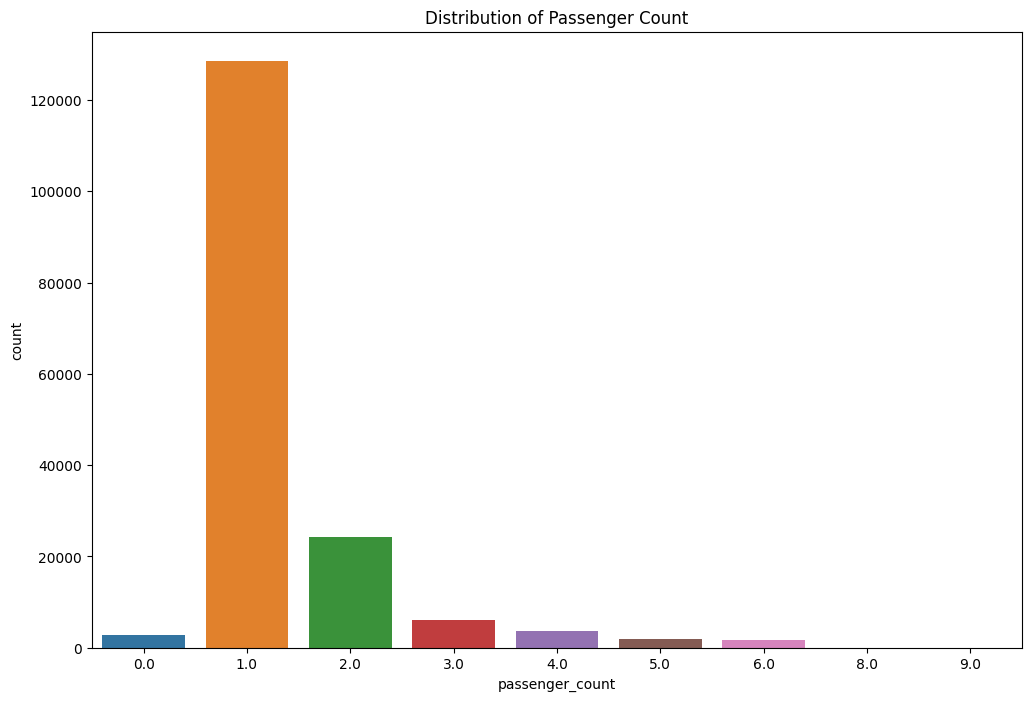

In [59]:
# Visualize the distribution of categorical variables (e.g., 'passenger_count', 'payment_type')
plt.figure(figsize=(12, 8))
sns.countplot(x='passenger_count', data=train)
plt.title('Distribution of Passenger Count')
plt.show()



> The plot provides a visual representation of the frequency of different passenger counts in the dataset. Majority of the rides have 1 passenger.

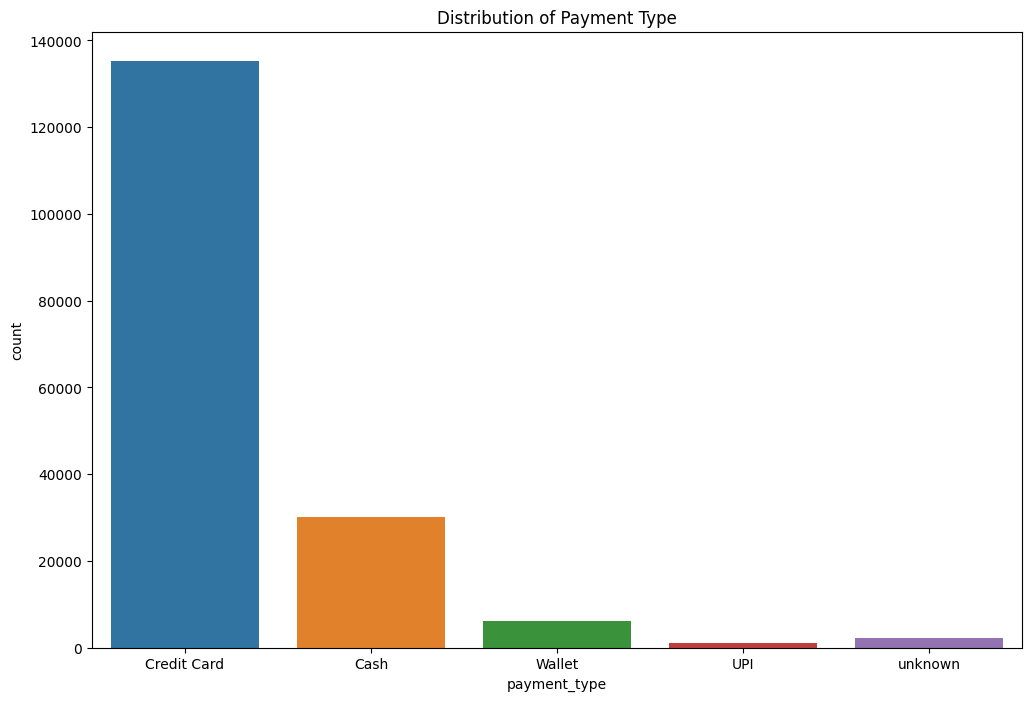

In [60]:
plt.figure(figsize=(12, 8))
sns.countplot(x='payment_type', data=train)
plt.title('Distribution of Payment Type')
plt.show()



> The plot, helping to understand the prevalence of different payment methods used in taxi rides. Most of the payment done through credit card. 

In [61]:
#Average fare per passenger:
train['avg_fare_per_passenger'] = train['total_amount'] / train['passenger_count']
print(train['avg_fare_per_passenger'] )

0         20.64
1         25.55
2         17.64
3         12.80
4          6.00
          ...  
174995     9.36
174996    59.95
174997    33.50
174998    40.80
174999    16.32
Name: avg_fare_per_passenger, Length: 175000, dtype: float64


In [62]:
#Average fare per mile:
train['avg_fare_per_mile'] = train['total_amount'] / train['trip_distance']
print(train['avg_fare_per_mile'])

0          9.644860
1          9.462963
2         15.339130
3         32.000000
4         16.363636
            ...    
174995     8.139130
174996     6.350636
174997    13.958333
174998     8.662420
174999    16.158416
Name: avg_fare_per_mile, Length: 175000, dtype: float64


In [63]:
#Percentage of cash transactions:

cash_transactions = (train['payment_type'] == 'Cash').sum()
total_transactions = train['payment_type'].count()
percentage_cash_transactions = (cash_transactions / total_transactions) * 100
print(f"Percentage of cash transactions: {percentage_cash_transactions:.2f}%")

Percentage of cash transactions: 17.22%


# Importing required libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore
from sklearn.svm import SVR
# Load the data
train = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv")
test = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")


In [65]:

# Convert pickup datetime column to datetime type
train['tpep_pickup_datetime'] = pd.to_datetime(train['tpep_pickup_datetime'])
test['tpep_pickup_datetime'] = pd.to_datetime(test['tpep_pickup_datetime'])

# Extract features from the datetime column
train['hour'] = train['tpep_pickup_datetime'].dt.hour
train['day_of_week'] = train['tpep_pickup_datetime'].dt.dayofweek

test['hour'] = test['tpep_pickup_datetime'].dt.hour
test['day_of_week'] = test['tpep_pickup_datetime'].dt.dayofweek

>  It extracts additional features from the datetime column, creating new columns 'hour' and 'day_of_week' in both datasets.

In [66]:

# Handle categorical variables by creating dummy variables
train = pd.get_dummies(train, columns=['day_of_week'], prefix='day')
test = pd.get_dummies(test, columns=['day_of_week'], prefix='day')

# Define numerical and categorical columns
numerical_columns = ['passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
                      'DOLocationID', 'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
                      'congestion_surcharge', 'Airport_fee', 'hour']

categorical_columns = ['payment_type', 'store_and_fwd_flag']

> Categorical variables are handled by creating dummy variables using Pandas' get_dummies function.
> For both the 'train' and 'test' DataFrames, dummy columns are generated for the 'day_of_week' feature, with a prefix 'day_'.

> The code defines two lists, 'numerical_columns' and 'categorical_columns,' to separate numerical and categorical columns. This distinction is useful for preprocessing data .

In [67]:
# Identify outliers using Z-score
z_scores = np.abs(zscore(train[numerical_columns]))
outliers = (z_scores > 3).all(axis=1)

# Remove outliers from the training data
train_no_outliers = train.loc[~outliers].reset_index(drop=True)

>  To identify and remove outliers from the training data, ensuring a cleaner dataset for further analysis or modeling.

In [68]:

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])


> For numerical columns, missing values are imputed with the mean using SimpleImputer, and the data is then standardized using StandardScaler.

> For categorical columns, missing values are imputed with the most frequent value using SimpleImputer, and one-hot encoding is applied using OneHotEncoder with the parameter drop='first' to avoid multicollinearity.

> These individual transformers are combined into a comprehensive ColumnTransformer named 'preprocessor,' which can be used to preprocess both numerical and categorical features simultaneously based on their respective pipelines.

# linear regression
> Linear Regression is a supervised learning algorithm used for predicting a continuous outcome variable based on one or more predictor variables. It assumes a linear relationship between the predictors and the target variable, aiming to minimize the difference between observed and predicted values

In [69]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression(fit_intercept=True))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_no_outliers.drop(['total_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1),
                                                    train_no_outliers['total_amount'],
                                                    test_size=0.3,
                                                    random_state=42)

# Fit the model using the pipeline
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Model - MSE: {:.4f}, R^2: {:.4f}".format(mse, r2))

Model - MSE: 178.4853, R^2: 0.7235


> The data is split into training and testing sets using train_test_split. The model is then fitted on the training data using the pipeline, and predictions are made on the testing set. Performance metrics, Mean Squared Error (MSE), and R-squared (R^2) are calculated to evaluate the model's accuracy in predicting the 'total_amount.'

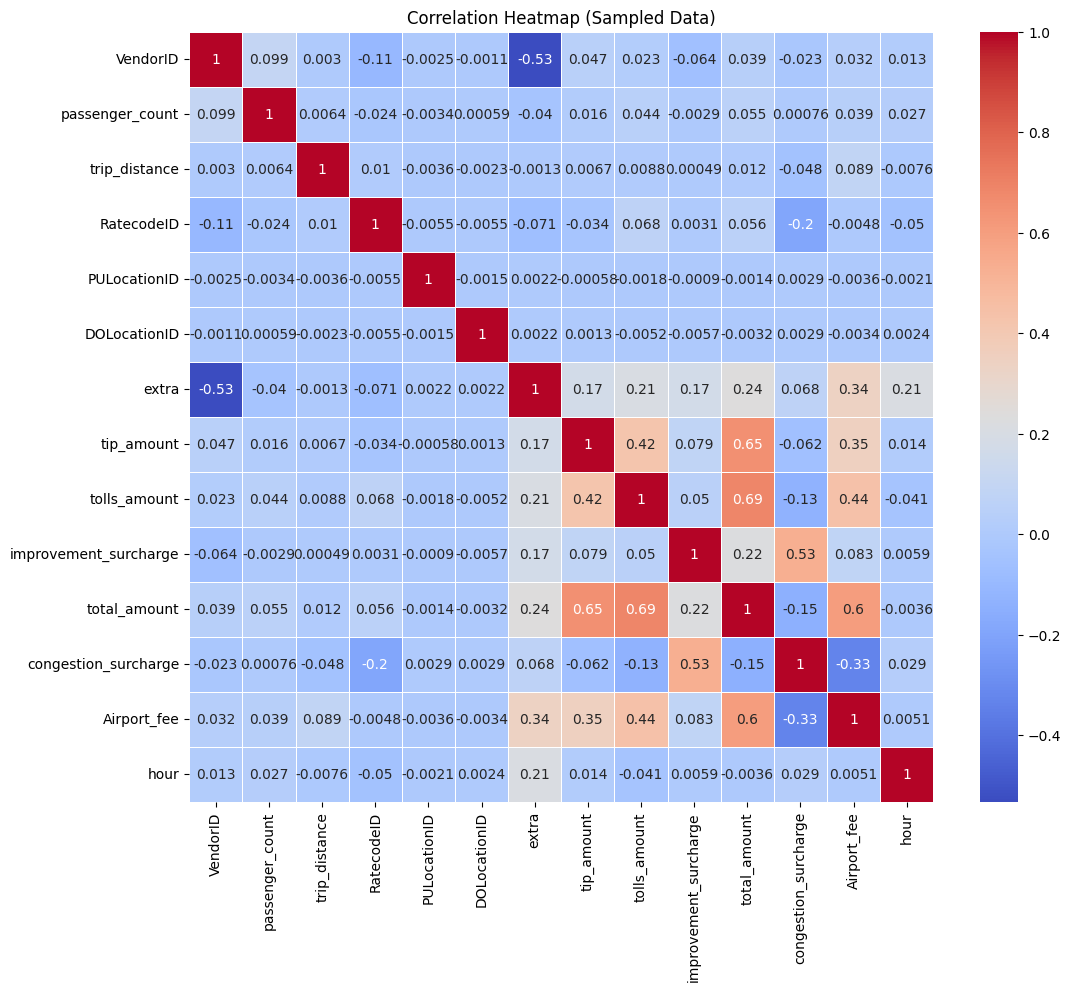

In [70]:
# Assuming you have already defined and processed train_no_outliers

# Sample the data
sampled_data = train_no_outliers.sample(frac=0.5)

# Identify non-numeric columns in the sampled data
non_numeric_columns_sampled = sampled_data.select_dtypes(exclude='number').columns

# Drop non-numeric columns from the sampled data
numeric_data_sampled = sampled_data.drop(non_numeric_columns_sampled, axis=1)

# Calculate correlation matrix for the sampled numeric data
correlation_matrix_sampled = numeric_data_sampled.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap using seaborn
sns.heatmap(correlation_matrix_sampled, annot=True, cmap='coolwarm', linewidths=.5)

# Show the plot
plt.title('Correlation Heatmap (Sampled Data)')
plt.show()


> The heatmap provides a graphical representation of the correlation between numerical features in the sampled data. The colors and values in the heatmap indicate the strength and direction of relationships between variables. Positive correlations are represented by warmer colors, negative correlations by cooler colors, and the intensity of the color reflects the strength of the correlation.

PUlocationID and DOlocationID aren't highly correlated with any features.So, we will drop these coloumn from our dataset.

In [71]:
train_no_outliers.drop(['PULocationID','DOLocationID'],axis=1)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,hour,day_2,day_3,day_4,day_5
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.00,17,True,False,False,False
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.00,23,False,True,False,False
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.00,10,False,False,True,False
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.00,13,False,True,False,False
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.00,22,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,1,2023-06-30 22:50:57,2023-06-30 22:22:22,3.0,3.45,1.0,N,Credit Card,1.0,8.732495,0.0,1.0,28.08,2.5,0.00,22,False,False,True,False
174996,1,2023-06-30 13:03:33,2023-06-30 14:04:57,1.0,9.44,1.0,N,Cash,5.0,0.283275,0.0,1.0,59.95,2.5,1.75,13,False,False,True,False
174997,0,2023-06-29 11:03:32,2023-06-29 12:13:34,1.0,2.40,1.0,N,Credit Card,2.5,4.245354,0.0,1.0,33.50,2.5,0.00,11,False,True,False,False
174998,1,2023-06-29 19:47:17,2023-06-29 19:08:55,1.0,4.71,1.0,N,Credit Card,2.5,10.479776,0.0,1.0,40.80,2.5,0.00,19,False,True,False,False


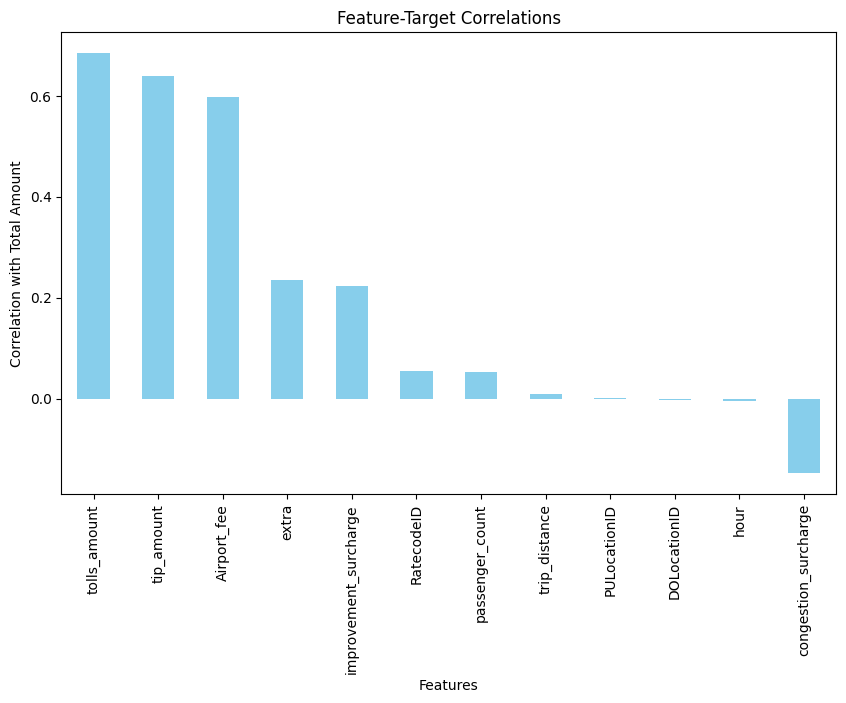

In [72]:
# Calculate feature-target correlations
feature_target_correlations = train_no_outliers[numerical_columns + ['total_amount']].corr()['total_amount'].sort_values(ascending=False)

# Plot the bar plot
plt.figure(figsize=(10, 6))
feature_target_correlations.drop('total_amount').plot(kind='bar', color='skyblue')
plt.title("Feature-Target Correlations")
plt.xlabel("Features")
plt.ylabel("Correlation with Total Amount")
plt.show()


> The plot, titled "Feature-Target Correlations," displays the correlation coefficients of each feature with the total fare amount. Features with higher positive values contribute positively to the total fare, while those with higher negative values have a negative impact.

# polynomial regression

In [73]:
# Define the model - Ridge Regression with Polynomial Features
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=1.0))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_no_outliers.drop(['total_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1),
                                                    train_no_outliers['total_amount'],
                                                    test_size=0.3,
                                                    random_state=42)

# Fit the model using the pipeline
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Model - MSE: {:.4f}, R^2: {:.4f}".format(mse, r2))

Model - MSE: 83.8251, R^2: 0.8702


# Submission file

In [74]:

# # Assuming you have already trained the model using the pipeline
# # Apply the same outlier removal to the test data
# test_no_outliers = test  # You might need to adjust this based on your specific use case
# X_submission_no_outliers = test_no_outliers.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)

# # Make predictions using the trained tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)model on the test data
# submission['total_amount'] = best_model.predict(X_submission_no_outliers)

# # # Load the test data
# # X_submission = test.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)

# # Initialize the submission DataFrame
# submission = pd.DataFrame(columns=['ID', 'total_amount'])
# submission['ID'] = range(1, len(X_submission) + 1)

# # # Make predictions using the trained model
# # submission['total_amount'] = best_model.predict(X_submission)

# # Save the submission file
# submission.to_csv('submission.csv', index=False)

# # Check the shape of the submission DataFrame
# print(submission.shape)


# KNeighborsRegressor

In [76]:


# Define the model - K-Nearest Neighbors Regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsRegressor())
])

# Define hyperparameters to tune
param_grid = {
    'model__n_neighbors': [3,5,7, 9, 11]  # You can extend the number of neighbors based on your needs
}

# Use GridSearchCV for hyperparameter tuning and cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(train_no_outliers.drop(['total_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1), train_no_outliers['total_amount'])

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_no_outliers.drop(['total_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1),
                                                    train_no_outliers['total_amount'],
                                                    test_size=0.3,
                                                    random_state=42)

# Fit the best model using the pipeline
best_model.fit(X_train, y_train)

# Make predictions
predictions = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Best Model - MSE: {:.4f}, R^2: {:.4f}".format(mse, r2))


# # Assuming you have already trained the model using the pipeline

# # Load the test data
# X_submission = test.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)

# # Initialize the submission DataFrame
# submission = pd.DataFrame(columns=['ID', 'total_amount'])
# submission['ID'] = range(1, len(X_submission) + 1)

# # Make predictions using the trained model
# submission['total_amount'] = best_model.predict(X_submission)

# # Save the submission file
# submission.to_csv('submission.csv', index=False)

# # Check the shape of the submission DataFrame
# print(submission.shape)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best Parameters: {'model__n_neighbors': 11}
Best Model - MSE: 142.4615, R^2: 0.7793


# RandomForest Regressor

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define the model - Random Forest Regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200, min_samples_split=5, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_no_outliers.drop(['total_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1),
                                                    train_no_outliers['total_amount'],
                                                    test_size=0.3,
                                                    random_state=42)

# Fit the model using the pipeline
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Model - MSE: {:.4f}, R^2: {:.4f}".format(mse, r2))


Model - MSE: 29.8552, R^2: 0.9538


#  **DecisionTreeRegressor**

In [80]:
from sklearn.tree import DecisionTreeRegressor

# Define the model - Decision Tree Regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_no_outliers.drop(['total_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1),
                                                    train_no_outliers['total_amount'],
                                                    test_size=0.3,
                                                    random_state=42)

# Fit the model using the pipeline
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Model - MSE: {:.4f}, R^2: {:.4f}".format(mse, r2))


Model - MSE: 37.9024, R^2: 0.9413


# **Boosting**

In [77]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")

# Define the model - Gradient Boosting Regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=7, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_no_outliers.drop(['total_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1),
                                                    train_no_outliers['total_amount'],
                                                    test_size=0.3,
                                                    random_state=42)

# Fit the model using the pipeline
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Model - MSE: {:.4f}, R^2: {:.4f}".format(mse, r2))


Model - MSE: 28.8716, R^2: 0.9553


In [ ]:
test_no_outliers = test  # You might need to adjust this based on your specific use case
X_submission_no_outliers = test_no_outliers.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)

# Make predictions using the trained model on the test data
submission = pd.DataFrame(columns=['ID', 'total_amount'])
submission['total_amount'] = model.predict(X_submission_no_outliers)  # Use the trained model directly

# Initialize the submission DataFrame
submission['ID'] = range(1, len(X_submission_no_outliers) + 1)

# Save the submission file
submission.to_csv('submission.csv', index=False)

print(submission.shape)

# **Multi-Layer Perceptron Regressor**

In [82]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define the model - Multi-Layer Perceptron Regressor with StandardScaler
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Add StandardScaler for feature normalization
    ('model', MLPRegressor(hidden_layer_sizes=(100,), activation='relu', alpha=0.01, random_state=42, max_iter=200))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_no_outliers.drop(['total_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1),
                                                    train_no_outliers['total_amount'],
                                                    test_size=0.3,
                                                    random_state=42)

# Fit the model using the pipeline
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Model - MSE: {:.4f}, R^2: {:.4f}".format(mse, r2))


Model - MSE: 49.4025, R^2: 0.9235


# SVM

In [87]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

# Define the model - Support Vector Machine (SVM) Regression with RBF Kernel
model = make_pipeline(preprocessor, SVR(kernel='rbf', C=1.0, gamma='scale'))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_no_outliers.drop(['total_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1),
                                                    train_no_outliers['total_amount'],
                                                    test_size=0.3,
                                                    random_state=42)

# Fit the model using the pipeline
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Model - MSE: {:.4f}, R^2: {:.4f}".format(mse, r2))


Model - MSE: 175.4825, R^2: 0.7282


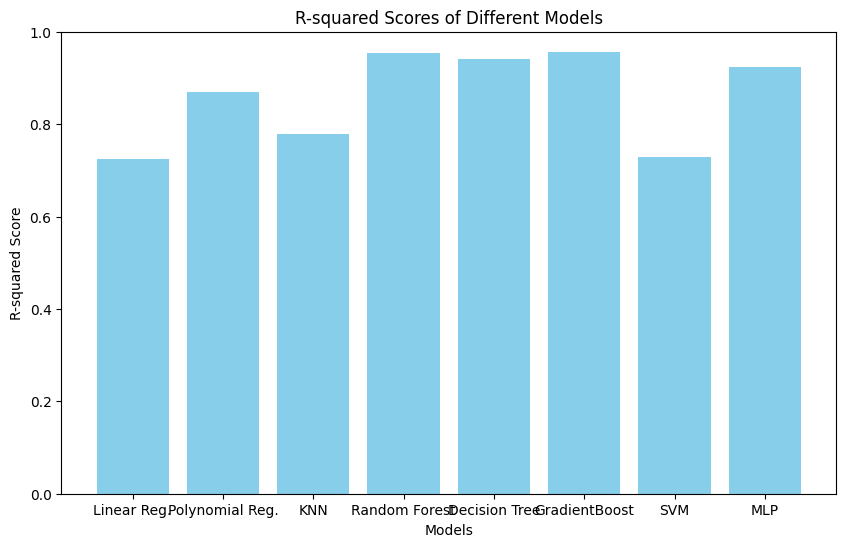

In [88]:
import matplotlib.pyplot as plt

r2_list = [0.7235, 0.8702, 0.7793, 0.9538, 0.9413, 0.9553,0.7282, 0.9235]
model_names = ['Linear Reg.', 'Polynomial Reg.', 'KNN', 'Random Forest', 'Decision Tree', 'GradientBoost','SVM','MLP']
# comparing the R-squared scores of different models.
# Plotting the R-squared scores for each model
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_list, color='skyblue')
plt.title('R-squared Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.ylim(0, 1)  # Set y-axis limit to the range [0, 1]
plt.show()
